
    Name : Jenisha Tailor
      Project 1 : Travel Aggregator Analysis
      Date of Submission :

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
bookingdata = pd.read_csv('/content/Bookings.csv')
print(bookingdata.head())

ModuleNotFoundError: No module named 'pandas'

In [ ]:
sessiondata = pd.read_csv('/content/Sessions.csv')
print(sessiondata.head())

1) Find the number of distinct bookings, sessions, and searches from the given data sets.

In [3]:
# Number of distinct bookings
distinctbookings = bookingdata['booking_id'].nunique()
print(distinctbookings)
# Number of distinct sessions
distinctsessions = sessiondata['session_id'].nunique()
print(distinctsessions)
# Number of distinct searches
distinctsearches = sessiondata['search_id'].nunique()
print(distinctsearches)

339
331
1360


2. How many sessions have more than one booking?

In [6]:
ses_booking_count = sessiondata.groupby("session_id")["booking_id"].nunique()
print(f'---------Session Booking Count-----------',ses_booking_count)
multisession_booking= ses_booking_count[ses_booking_count>1]
print(f'---------Multiple Session Booking Count-----------',multisession_booking.count)

---------Session Booking Count----------- session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 331, dtype: int64
---------Multiple Session Booking Count----------- <bound method Series.count of session_id
session_134    2
session_154    2
session_196    2
session_231    2
session_27     2
session_290    2
session_298    2
session_324    2
session_50     2
session_76     2
Name: booking_id, dtype: int64>


3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week?
-use bookingtime column - day of week =toDatetime(),
-dt.day_name() -then add new column to booking data frame with day of week "day of week "
-count how many monday,.... using value_count() and find maximum like booking perday
- then plot the map plt.pie (bookingperday, labels,etc configuration)

Thursday


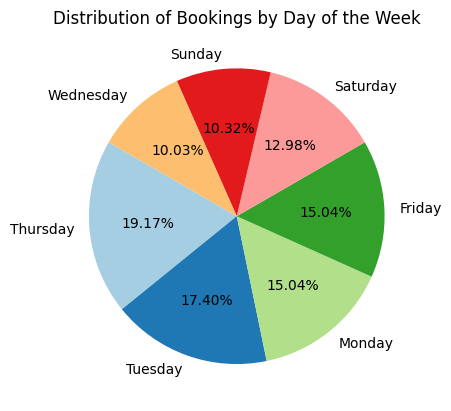

In [7]:
#convert booking_time column to datetime
bookingdata['booking_time']= pd.to_datetime(bookingdata['booking_time'])
#extract day of week from date
bookingdata['day_of_week'] = bookingdata['booking_time'].dt.day_name()
#print(bookingdata.head())
#bookings per day
perdaybooking = bookingdata['day_of_week'].value_counts()
#Which day has highest booking
highestbookingday = perdaybooking.idxmax()
print(highestbookingday)

#plot the map for distribution of day wise booking
plt.pie(perdaybooking, labels=perdaybooking.index, autopct='%1.2f%%', startangle=150, colors=plt.cm.Paired.colors)
plt.title('Distribution of Bookings by Day of the Week')
plt.show()


4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.
-use service_name column and total gross value INRAmout and find aggrigate


In [8]:
aggdata = bookingdata.groupby('service_name').agg(Total_bookings=('booking_id', 'nunique'),Total_grossamt_inr=('INR_Amount', 'sum')
)
# Display the results of aggrigate data
print(aggdata)

              Total_bookings  Total_grossamt_inr
service_name                                    
GOIBIBO                  186          5897637.97
MMT                       48           665669.08
YATRA                    105          3378702.13


5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?
-use customerid, from_City , to_city
-values_Count : multiple booking customer
-filterdbooking new dataframe we creating
-filteredbooking apply groupby for fromcity and tocity and find size and you get how many bookings are there for route

-

In [9]:
#find customerwise booking count
custbookingcount = bookingdata.groupby('customer_id')['booking_id'].nunique()
#print(custbookingcount)
#find customer who have more than 1 booking
multibookingcust = custbookingcount[custbookingcount>1].index
print(multibookingcust)
#filterd the data of for these customers
filtereddata = bookingdata[bookingdata['customer_id'].isin(multibookingcust)]
#print(filtereddata)
# Group by route ('from_city', 'to_city') and count
routecounts = filtereddata.groupby(['from_city', 'to_city']).size().reset_index(name='countbooking')
print(routecounts)
# Find the most booked route
mostbookedroute = routecounts.loc[routecounts['countbooking'].idxmax()]
print("------Most booked route (for customers with more than 1 booking):-----")
print(f"From City: {mostbookedroute['from_city']}, To City: {mostbookedroute['to_city']}")
print(f"Number of Bookings: {mostbookedroute['countbooking']}")


Index(['customer_120', 'customer_137', 'customer_144', 'customer_155',
       'customer_160', 'customer_176', 'customer_179', 'customer_200',
       'customer_217', 'customer_230', 'customer_235', 'customer_237',
       'customer_245', 'customer_246', 'customer_247', 'customer_255',
       'customer_265', 'customer_28', 'customer_282', 'customer_297',
       'customer_33', 'customer_44', 'customer_49', 'customer_67',
       'customer_93', 'customer_97'],
      dtype='object', name='customer_id')
             from_city            to_city  countbooking
0            Ahmedabad            Gwalior             1
1               Barelā            Gurgaon             1
2          Bhubaneswar            Durlaga             1
3              Bikaner            Gurgaon             1
4              Bālāpur         Düsseldorf             2
5                Delhi              Jammu             1
6                Delhi              Paris             1
7                Delhi           Varanasi          

6. Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

- valaucount from_City column and what are departure city counts >= 5
- filtered data frame using minmum departure booking - then groupby on fromcity column
- sort df by days_to_departure column and first 3 city will be answer.


In [10]:
departurecitycount = bookingdata['from_city'].value_counts()
#print(departurecitycount)
citywithmindeparture = departurecitycount[departurecitycount>5].index
#print(citywithmindeparture)
#filterd df using minimum departure booking
filtereddata = bookingdata[bookingdata['from_city'].isin(citywithmindeparture)]
#print(f"Filtered data\n",filtereddata)

#avgday of departure booking
avgdaydeparture = filtereddata.groupby('from_city')['days_to_departure'].mean().reset_index()

#find top 3
top3cities = avgdaydeparture.sort_values(by='days_to_departure', ascending=False).head(3)
print(top3cities)

    from_city  days_to_departure
1     Bālāpur          46.166667
4  Devanhalli          29.583333
2     Chennai          26.187500


7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation?
-select numerical columns
- apply corelation matrix corr()
- sns.heatmap(give matrix) seaborn libray
- maximum correlation need to find ? convert to 1d array and sort the value and
-remove the self correlation using filtering
- what will be the coreation of variable of itself?
The correlation of a variable with itself is always 1.
Correlation Values:

1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.
Interpretation: Correlation does not imply causation. Even if two variables have a high correlation, it does not mean that one causes the other to change.

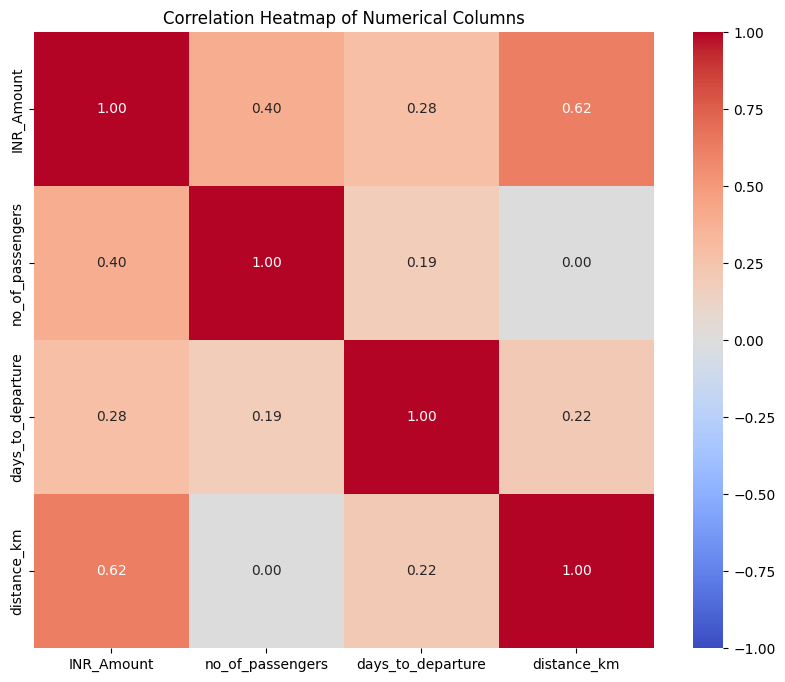

---------------------------------------------
The pair of columns with the maximum correlation is: ('INR_Amount', 'distance_km') with a correlation of 0.62


In [13]:
# Select numerical columns
numericaldata = bookingdata.select_dtypes(include=[np.number])

# apply the correlation matrix
correlationmatrix = numericaldata.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlationmatrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

#Identify the pair of columns with the maximum correlation
mask = np.triu(np.ones_like(correlationmatrix, dtype=bool))
correlation_matrix_masked = correlationmatrix.mask(mask)

# Find the maximum correlation pair
max_corr = correlation_matrix_masked.unstack().idxmax()
max_value = correlation_matrix_masked.unstack().max()
print(f"---------------------------------------------")
print(f"The pair of columns with the maximum correlation is: {max_corr} with a correlation of {max_value:.2f}")


8.For each service, which is the most used device type for making bookings on the platform
- bookingdataset
- groupby on service name column and get maximum count

In [14]:
devicecounts = bookingdata.groupby(['service_name', 'device_type_used']).size().reset_index(name='booking_count')
mostuseddevicebyservice = devicecounts.loc[devicecounts.groupby('service_name')['booking_count'].idxmax()]
print("------Most used device type for making bookings on the platform---------:")
print(mostuseddevicebyservice)

------Most used device type for making bookings on the platform---------:
  service_name device_type_used  booking_count
2      GOIBIBO              IOS             70
5          MMT          Desktop             30
9        YATRA          Desktop             51


9. Plot the trends at a quarterly frequencyn(time series) for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device.
-need to find year wise count of device type
- bookingdate and covert to date time dt.to_period('Q')- q - quater will retrive
- new column "year_quater" will contain previous find data
- groupby() on device type and year_quarter
plot line
timeseries - how value as changing according to time that is time series


<ipython-input-15-2bdc1144b634>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookingdata['year_quarter'] = bookingdata['booking_time'].dt.to_period('Q')


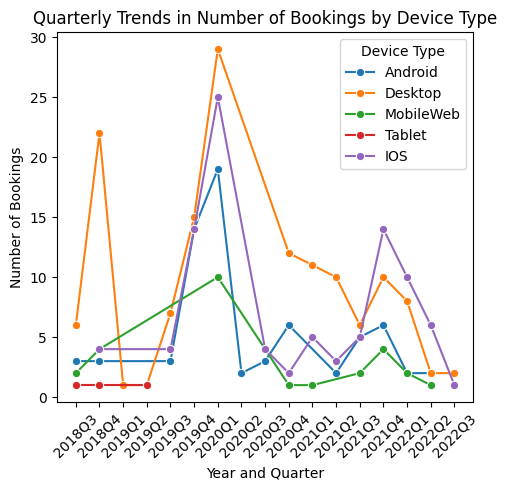

In [15]:
bookingdata['booking_time'] = pd.to_datetime(bookingdata['booking_time'])
bookingdata['year_quarter'] = bookingdata['booking_time'].dt.to_period('Q')
quarterlybookings = bookingdata.groupby(['year_quarter', 'device_type_used']).size().reset_index(name='quaterbookcount')
quarterlybookings['year_quarter'] = quarterlybookings['year_quarter'].astype(str)

plt.figure(figsize=(5, 5))

sns.lineplot(data=quarterlybookings, x='year_quarter', y='quaterbookcount', hue='device_type_used', marker="o")

plt.title('Quarterly Trends in Number of Bookings by Device Type')
plt.xlabel('Year and Quarter')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Device Type')
plt.tight_layout()

plt.show()

10. Consider the following example:
12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.
Searches = 100 bookings = 10 customers = 12
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:
• What is the average oBSR for each month of the year?
• What is the average oBSR for each day of the week?
• Plot a time series of oBSR on all the given dates.


--booking to search ratio we need to find for each month, day of week and all dates

-- sessions(searc time columb) and bookings(booking time column) data set used
-- time column to dattime format on both df
-- dt.to_period('M') will give us month and add new column as "Month" which store month data  in booking data set
-- same for session_time  so we get this booking occure on each month
-- now to get date dt.dayname() = for day
--On Month perform group by and find size
-- same on session df
-- ration bookingmonth/session month - so we get ratio


    booking_month  month_ratio
0               1     0.592383
1               2     1.191512
2               3     1.513447
3               4     1.804775
4               5     2.071128
5               6     2.398368
6               7     3.119465
7               8     5.302020
8               9     4.463770
9              10     4.625722
10             11     7.192450
11             12     6.506061


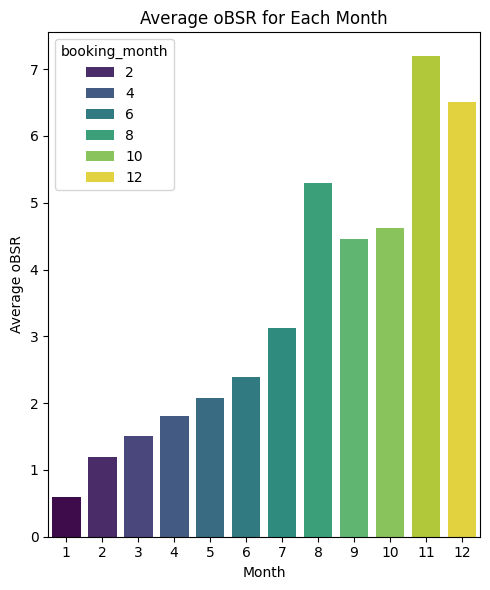

   book_day_of_week  day_ratio
0                 0   0.200787
1                 1   0.270642
2                 2   0.156682
3                 3   0.222603
4                 4   0.251232
5                 5   0.220000
6                 6   0.309735


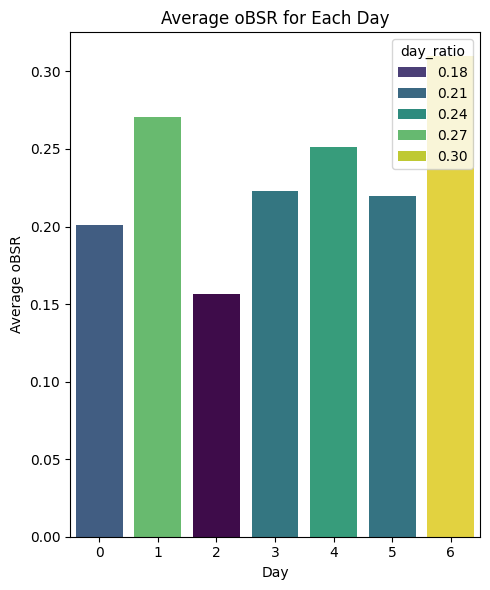

In [19]:
bookingdata['booking_time'] = pd.to_datetime(bookingdata['booking_time'])
sessiondata['search_time'] = pd.to_datetime(sessiondata['search_time'],format='mixed')

#1. What is the average oBSR for each month of the year?
bookingdata['booking_month'] = bookingdata['booking_time'].dt.month  #to_period('M')
sessiondata['search_month'] = sessiondata['search_time'].dt.month
#Average OBSR
bookingdata['month_ratio'] = bookingdata['booking_month'] /sessiondata['search_month']
monthlyObsr = bookingdata.groupby('booking_month')['month_ratio'].mean().reset_index()
print(monthlyObsr)
#plot
plt.figure(figsize=(5, 6))
sns.barplot(x=monthlyObsr['booking_month'], y=monthlyObsr['month_ratio'],hue=monthlyObsr['booking_month'], palette="viridis")
plt.title('Average oBSR for Each Month')
plt.xlabel('Month')
plt.ylabel('Average oBSR')
plt.tight_layout()
plt.show()

#2. What is the average oBSR for each day of the week?
bookingdata['book_day_of_week'] = bookingdata['booking_time'].dt.dayofweek
sessiondata['search_day_of_week'] = sessiondata['search_time'].dt.dayofweek

# Group by day of week to find total bookings and searches
totalbookingsperday = bookingdata.groupby('book_day_of_week').size()
totalsearchesperday = sessiondata.groupby('search_day_of_week').size()

# Calculate the average oBSR for each day of the week
dailyobsr = totalbookingsperday / totalsearchesperday
dailyobsr = dailyobsr.reset_index(name='day_ratio')
print(dailyobsr)

#plot
plt.figure(figsize=(5, 6))
sns.barplot(x=dailyobsr['book_day_of_week'], y=dailyobsr['day_ratio'],hue=dailyobsr['day_ratio'], palette="viridis")
plt.title('Average oBSR for Each Day')
plt.xlabel('Day')
plt.ylabel('Average oBSR')
plt.tight_layout()
plt.show()